In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

# Problem 1

In [48]:
def problem1_task1(df, alpha, n_splits=10):
    # Seperate features and label
    # with copy we ensure that nothing changes in original dataframe
    X = df.loc[:, df.columns.str.startswith("X")].copy()
    Y = df.loc[:, df.columns.str.startswith("Y")].copy()
    for c in Y.columns:
        y = Y[c]
        # 10 repetitons
        for i in range(10):
            # apply Kfold 
            kf = KFold(n_splits=n_splits)
            for train_ix, test_ix in kf.split(X):
                X_train, y_train = X.loc[train_ix], y[train_ix]
                X_test, y_test = X.loc[test_ix], y[test_ix]
                # train the model with given parameters
                model = Ridge(alpha=alpha)
                model.fit(X_train, y_train)
                # predict the test data
                y_preds = model.predict(X_test)
                # calc mae
                mae = mean_absolute_error(y_test, y_preds)
                maes.append(mae)
                # calc mse
                mse = mean_squared_error(y_test, y_preds)
                mses.append(mse)
        print(f"For target {c} Alpha {alpha}; mean mae:{np.mean(maes):.4f}, mean mse:{np.mean(mses):.4f}, std mae:{np.std(maes):.4f}, std mse:{np.std(mses):.4f}")

In [49]:
path = r"homework1-data/ENB2012_data.xlsx"
df = pd.read_excel(path)

alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

for alpha in alphas:
    problem1_task1(df, alpha)

For target Y1 Alpha 0.001; mean mae:2.2509, mean mse:9.8877, std mae:0.6241, std mse:5.6962
For target Y2 Alpha 0.001; mean mae:2.3245, mean mse:10.6020, std mae:0.3698, std mse:2.6445
For target Y1 Alpha 0.01; mean mae:2.2489, mean mse:9.8898, std mae:0.6247, std mse:5.6989
For target Y2 Alpha 0.01; mean mae:2.3208, mean mse:10.6075, std mae:0.3695, std mse:2.6438
For target Y1 Alpha 0.1; mean mae:2.2738, mean mse:10.0227, std mae:0.6222, std mse:5.7553
For target Y2 Alpha 0.1; mean mae:2.3428, mean mse:10.7749, std mae:0.3587, std mse:2.6505
For target Y1 Alpha 1.0; mean mae:2.3432, mean mse:10.3999, std mae:0.6773, std mse:6.5012
For target Y2 Alpha 1.0; mean mae:2.4098, mean mse:11.1341, std mae:0.3639, std mse:2.8804
For target Y1 Alpha 10.0; mean mae:2.6326, mean mse:13.1228, std mae:1.0769, std mse:11.1221
For target Y2 Alpha 10.0; mean mae:2.6104, mean mse:12.6629, std mae:0.5714, std mse:4.7890


In [ ]:
y1_mae = [2.2509,2.2489,2.2738,2.3432,2.6326]
y2_mae = [2.2509,2.2489,2.2738,2.3432,2.6326]
y1_mse = [2.2509,2.2489,2.2738,2.3432,2.6326]
y2_mse = [2.2509,2.2489,2.2738,2.3432,2.6326]

In [62]:
def problem1_task2(df, parameters, n_splits=10):
    X = df.loc[:, df.columns.str.startswith("X")].copy()
    Y = df.loc[:, df.columns.str.startswith("Y")].copy()
    X_train_, X_test_, y_tr, y_tt = train_test_split(X, Y, random_state=1773)

    for c in Y.columns:
        y_train, y_test = y_tr[c], y_tt[c]
        rfr = RandomForestRegressor()
        grid_model = GridSearchCV(rfr, parameters)
        grid_model.fit(X_train_, y_train)
        best_params = grid_model.best_params_
        print(f"Best params for target {c}: {best_params}")
        # 10 repetitons
        maes, mses = [], []
        for i in range(10):
            # apply Kfold 
            kf = KFold(n_splits=n_splits)
            for train_ix, test_ix in kf.split(X):
                X_train, y_train = X.loc[train_ix], Y.loc[train_ix, c]
                X_test, y_test = X.loc[test_ix], Y.loc[test_ix, c]
                rfr = RandomForestRegressor(**best_params)
                rfr.fit(X_train, y_train)
                y_preds = rfr.predict(X_test)
                # calc mae
                mae = mean_absolute_error(y_test, y_preds)
                maes.append(mae)
                # calc mse
                mse = mean_squared_error(y_test, y_preds)
                mses.append(mse)
        print(f"For target {c}; mean mae:{np.mean(maes):.4f}, mean mse:{np.mean(mses):.4f}, std mae:{np.std(maes):.4f}, std mse:{np.std(mses):.4f}")

In [63]:
path = r"homework1-data/ENB2012_data.xlsx"
df = pd.read_excel(path)

parameters = {
    "n_estimators": [10, 50, 100, 250, 500],
    "max_depth": [50, 150, 250], 
    "min_samples_split": [2, 3], 
    "min_samples_leaf": [1, 2, 3] 
}

problem1_task2(df, parameters)

Best params for target Y1: {'max_depth': 250, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
For target Y1; mean mae:0.7618, mean mse:2.8015, std mae:1.0474, std mse:7.4452
Best params for target Y2: {'max_depth': 250, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
For target Y2; mean mae:1.1423, mean mse:3.0339, std mae:0.4306, std mse:1.8834


# Problem 2

In [6]:
def problem2_task1(df, C, n_splits=10, n_repetitions=10):
    X = df.loc[:, df.columns[~df.columns.isin(["y", "duration"])]].copy()
    y = df["y"].copy()
    # some features are categorical and Ridge regression only takes numeric values
    # so i encoded them.
    cols_to_be_encode = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
    for col in cols_to_be_encode:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    # encode classes.
    y = np.where(y == "yes", 1, -1)
    cols_to_be_scale = ["age", "pdays", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
    for col in cols_to_be_scale:
        sc = StandardScaler()
        X[col] = sc.fit_transform(np.array(X[col]).reshape(-1, 1))
    # repetitons
    aucs = []
    for i in range(n_repetitions):
        # apply Kfold 
        kf = KFold(n_splits=n_splits)
        for train_ix, test_ix in kf.split(X):
            X_train, y_train = X.loc[train_ix], y[train_ix]
            X_test, y_test = X.loc[test_ix], y[test_ix]
            lr = LogisticRegression(C=C, max_iter=500) #solver="newton-cg",
            lr.fit(X_train, y_train)
            y_preds = lr.predict(X_test)
            # calc auc
            auc = roc_auc_score(y_test, y_preds)
            aucs.append(auc)

    print(f"For C value {c}; mean auc:{np.mean(aucs):.4f}")
    return np.mean(aucs)

For C value 0.0001; mean auc:0.5000
For C value 526.3158842105263; mean auc:0.5119
For C value 1052.6316684210526; mean auc:0.5119
For C value 1578.947452631579; mean auc:0.5118
For C value 2105.2632368421055; mean auc:0.5118
For C value 2631.579021052632; mean auc:0.5119
For C value 3157.894805263158; mean auc:0.5120
For C value 3684.210589473684; mean auc:0.5120
For C value 4210.526373684211; mean auc:0.5120
For C value 4736.842157894737; mean auc:0.5119
For C value 5263.157942105264; mean auc:0.5117
For C value 5789.4737263157895; mean auc:0.5118
For C value 6315.789510526316; mean auc:0.5119
For C value 6842.105294736843; mean auc:0.5119
For C value 7368.421078947368; mean auc:0.5119
For C value 7894.736863157895; mean auc:0.5119
For C value 8421.05264736842; mean auc:0.5117
For C value 8947.368431578947; mean auc:0.5118
For C value 9473.684215789473; mean auc:0.5118
For C value 10000.0; mean auc:0.5118


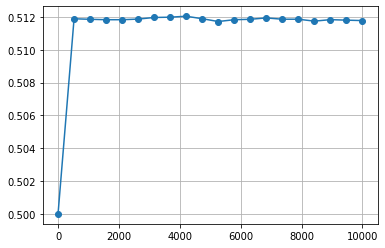

In [7]:
path = r"homework1-data/bank-additional-full.csv"
df = pd.read_csv(path, sep=";")

c_values = [1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1, 8, 1e1, 5e1, 8e1, 1e2, 8e1, 5e2, 8e2, 1e3, 5e3, 8e3, 1e4]
c_values = np.linspace(1e-4, 1e4, 20)
mean_aucs = []
for c in c_values:
    mean_auc = problem2_task1(df, c)
    mean_aucs.append(mean_auc)

plt.grid()
plt.plot(c_values, mean_aucs, marker="o")

In [8]:
def problem2_task2(df, parameters, n_splits=3, n_repetitions=3):
    X = df.loc[:, df.columns[~df.columns.isin(["y", "duration"])]].copy()
    y = df["y"].copy()
    # some features are categorical and Ridge regression only takes numeric values
    # so i encoded them.
    cols_to_be_encode = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
    for col in cols_to_be_encode:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    # encode classes.
    y = np.where(y == "yes", 1, -1)
    cols_to_be_scale = ["age", "pdays", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
    for col in cols_to_be_scale:
        sc = StandardScaler()
        X[col] = sc.fit_transform(np.array(X[col]).reshape(-1, 1))
    
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, random_state=1773)
    rfr = RandomForestRegressor()
    grid_model = GridSearchCV(rfr, parameters)
    grid_model.fit(X_train_, y_train_)
    best_params = grid_model.best_params_
    print(f"Best params: {best_params}")
    # repetitons
    aucs = []
    for i in range(n_repetitions):
        # apply Kfold 
        kf = KFold(n_splits=n_splits)
        for train_ix, test_ix in kf.split(X):
            X_train, y_train = X.loc[train_ix], y[train_ix]
            X_test, y_test = X.loc[test_ix], y[test_ix]
            rf = RandomForestClassifier(**best_params)
            rf.fit(X_train, y_train)
            y_preds = rf.predict(X_test)
            # calc auc
            auc = roc_auc_score(y_test, y_preds)
            aucs.append(auc)
    print(f"For C value {c}; max auc:{np.max(aucs):.4f}")


In [9]:
path = r"homework1-data/bank-additional-full.csv"
df = pd.read_csv(path, sep=";")

parameters = {
    "n_estimators": [10, 50, 100, 250, 500],
    "max_depth": [50, 150, 250], 
    "min_samples_split": [2, 3], 
    "min_samples_leaf": [1, 2, 3] 
}

problem2_task2(df, parameters)

KeyboardInterrupt: 

In [10]:
def problem2_task3(df, parameters, n_splits=3, n_repetitions=3):
    X = df.loc[:, df.columns[~df.columns.isin(["y", "duration"])]].copy()
    y = df["y"].copy()
    # some features are categorical and Ridge regression only takes numeric values
    # so i encoded them.
    cols_to_be_encode = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
    for col in cols_to_be_encode:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    # encode classes.
    y = np.where(y == "yes", 1, -1)
    cols_to_be_scale = ["age", "pdays", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
    for col in cols_to_be_scale:
        sc = StandardScaler()
        X[col] = sc.fit_transform(np.array(X[col]).reshape(-1, 1))
    
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, random_state=1773)
    mlp = MLPClassifier()
    grid_model = GridSearchCV(mlp, parameters)
    grid_model.fit(X_train_, y_train_)
    best_params = grid_model.best_params_
    print(f"Best params for target {c}: {best_params}")
    # 10 repetitons
    aucs = []
    for i in range(n_repetitions):
        # apply Kfold 
        kf = KFold(n_splits=n_splits)
        for train_ix, test_ix in kf.split(X):
            X_train, y_train = X.loc[train_ix], y[train_ix]
            X_test, y_test = X.loc[test_ix], y[test_ix]
            mlp = MLPClassifier(**best_params)
            mlp.fit(X_train, y_train)
            y_preds = mlp.predict(X_test)
            # calc auc
            auc = roc_auc_score(y_test, y_preds)
            aucs.append(auc)
    print(f"For C value {c}; max auc:{np.max(aucs):.4f}")


In [ ]:
path = r"homework1-data/bank-additional-full.csv"
df = pd.read_csv(path, sep=";")

parameters = {
    "hidden_layer_sizes": [(10,10,10), (10,10,10,10), (10,10,10,10,10), (10,10,10,10,10,10)],
    "alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1]
}

problem2_task3(df, parameters, n_splits=3, n_repetitions=3)

In [ ]:
def problem2_task4(df, model):
    y_pred = cross_val_predict(model, X, y, cv=5)
    # generate classification report
    print(classification_report(y, y_pred))

In [ ]:
path = r"homework1-data/bank-additional-full.csv"
df = pd.read_csv(path, sep=";")

models = [LogisticRegression(C=10e4, max_iter=500), RandomForestClassifier(**best_params), ]

for model in models:
    problem2_task3(df, parameters, n_splits=3, n_repetitions=3):